In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

C:\Users\KIROO\AppData\Local\Temp\ipykernel_10388\968383121.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('test_motion_data.csv')
df.shape

(3084, 8)

In [3]:
df.columns

Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class',
       'Timestamp'],
      dtype='object')

In [4]:
df.isnull().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

AccX         float64
AccY         float64
AccZ         float64
GyroX        float64
GyroY        float64
GyroZ        float64
Class         object
Timestamp      int64
dtype: object

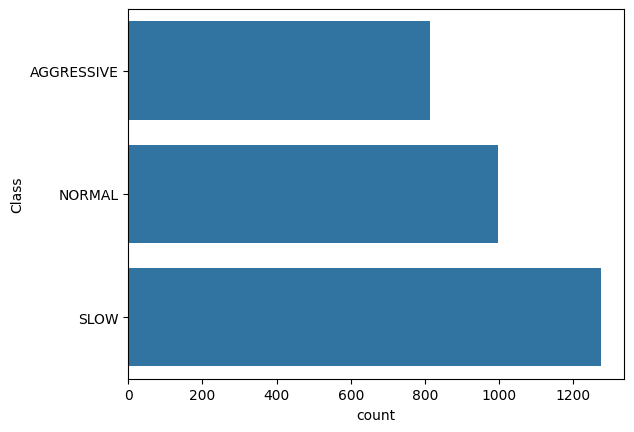

In [7]:
# some visulaiztion

sns.countplot(df['Class'])
plt.show()

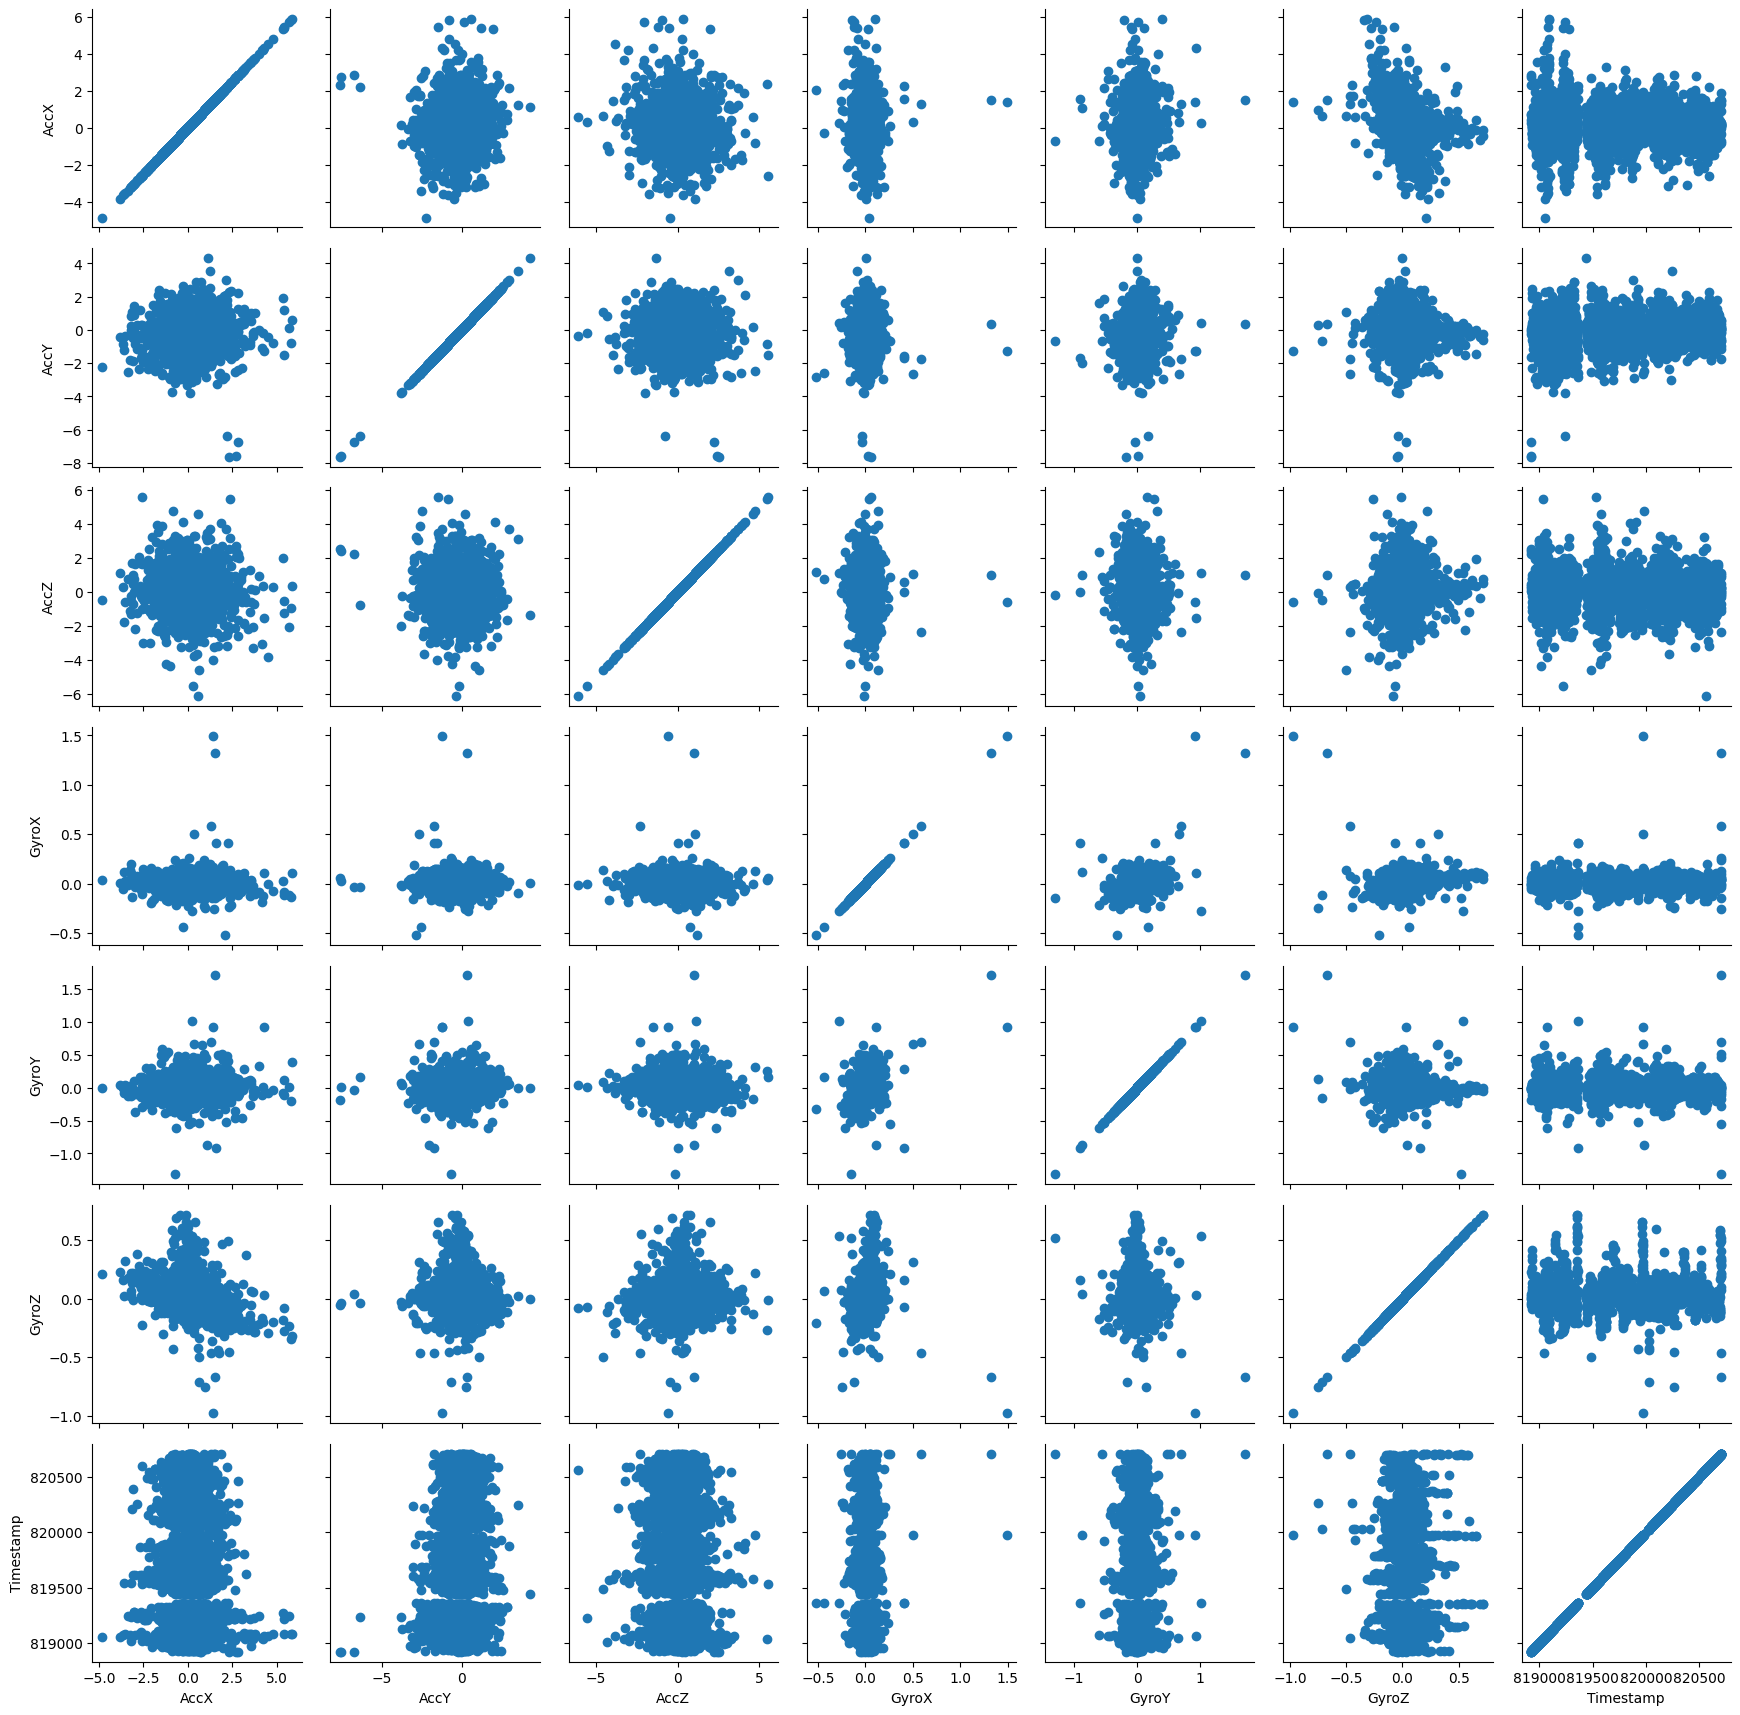

In [8]:
X=sns.PairGrid(df)
X=X.map(plt.scatter)
plt.show()

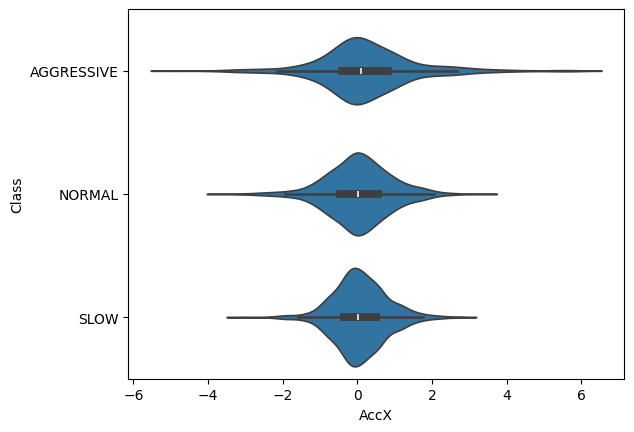

In [9]:
sns.violinplot(x='AccX',y='Class',data=df)
plt.show()

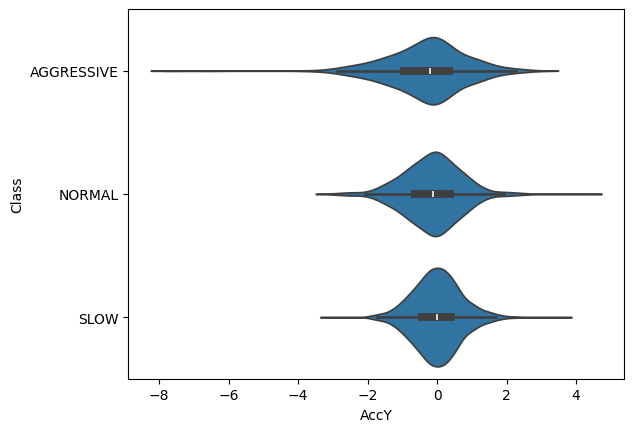

In [10]:
sns.violinplot(x='AccY',y='Class',data=df)
plt.show()

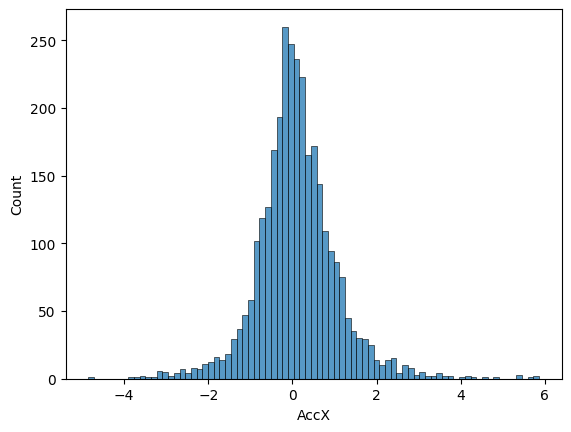

In [11]:
sns.histplot(x='AccX',data=df)
plt.show()

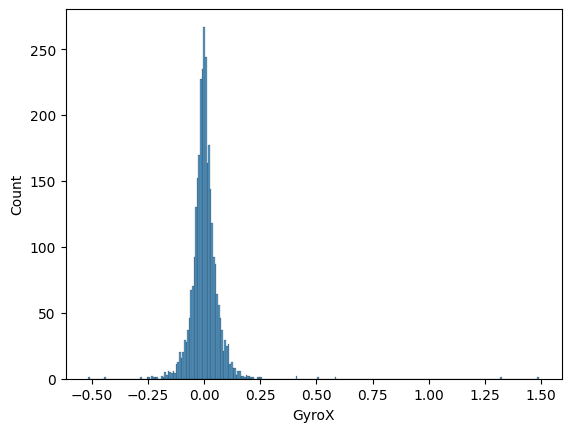

In [12]:
sns.histplot(x='GyroX',data=df)
plt.show()

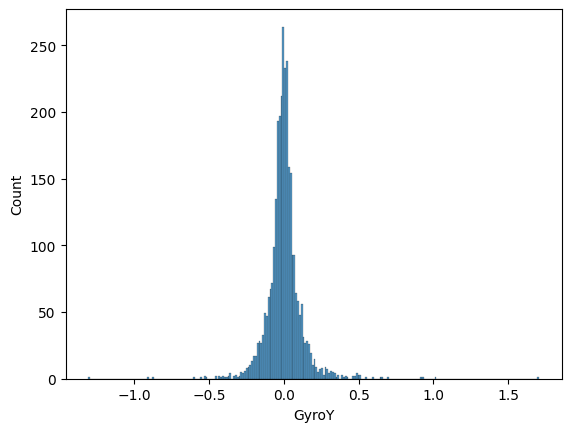

In [13]:
sns.histplot(x='GyroY',data=df)
plt.show()


In [14]:
# to covert object to int
df.replace({'Class':{'SLOW':0,'NORMAL':1,'AGGRESSIVE':2}},inplace=True)


C:\Users\KIROO\AppData\Local\Temp\ipykernel_10388\3800851988.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Class':{'SLOW':0,'NORMAL':1,'AGGRESSIVE':2}},inplace=True)


In [15]:
df.corr()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
AccX,1.000000,0.123357,-0.088352,-0.075195,0.055494,-0.296183,0.066529,-0.063839
AccY,0.123357,1.000000,-0.052714,-0.009015,0.026259,0.001352,-0.140136,0.133272
AccZ,-0.088352,-0.052714,1.000000,-0.037812,-0.053695,0.072681,0.008518,-0.012810
GyroX,-0.075195,-0.009015,-0.037812,1.000000,0.356603,0.143387,0.003967,0.005457
GyroY,0.055494,0.026259,-0.053695,0.356603,1.000000,-0.029605,0.017606,-0.017748
GyroZ,-0.296183,0.001352,0.072681,0.143387,-0.029605,1.000000,0.034070,-0.014611
Class,0.066529,-0.140136,0.008518,0.003967,0.017606,0.034070,1.000000,-0.946576
Timestamp,-0.063839,0.133272,-0.012810,0.005457,-0.017748,-0.014611,-0.946576,1.000000


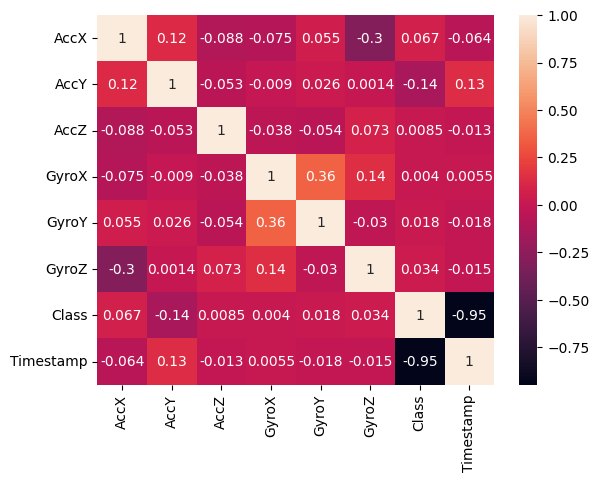

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
# to know which feature most effective on data 
X=df.drop(columns='Class',axis=1)
y=df['Class']

model = RandomForestClassifier()
model.fit(X, y)


importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
print(feature_importance_df.sort_values(by='importance', ascending=False))

     feature  importance
6  Timestamp    0.921925
1       AccY    0.022114
0       AccX    0.020300
5      GyroZ    0.009699
3      GyroX    0.009213
2       AccZ    0.009184
4      GyroY    0.007564


In [18]:
# droop this columns because not effective in data set
df.drop(columns=['AccZ','GyroY'],inplace=True,axis=1)

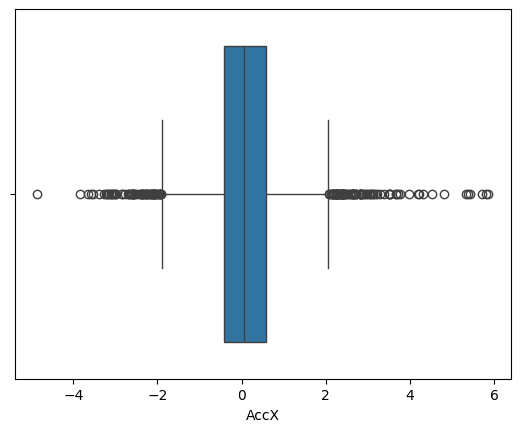

In [19]:
# to see outlayers in this column
sns.boxplot(x='AccX',data=df)
plt.show()

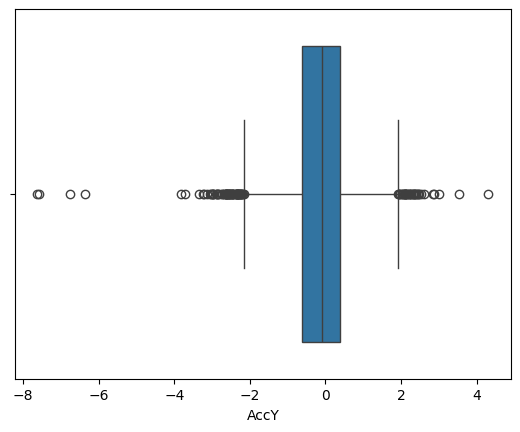

In [20]:
sns.boxplot(x='AccY',data=df)
plt.show()

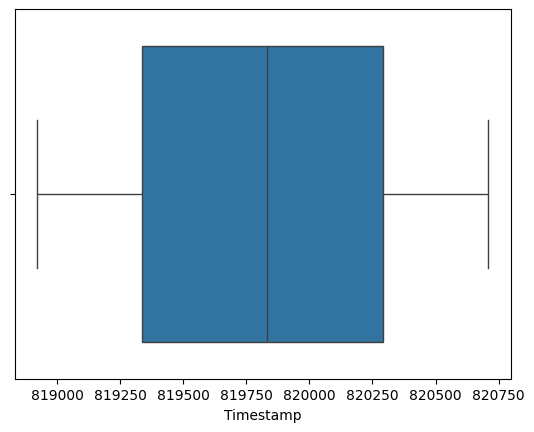

In [21]:
sns.boxplot(x='Timestamp',data=df)
plt.show()

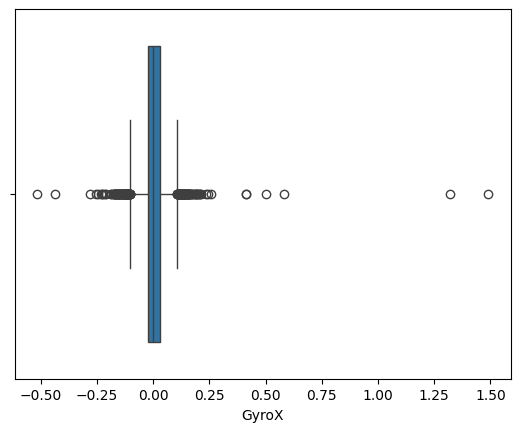

In [22]:
sns.boxplot(x='GyroX',data=df)
plt.show()


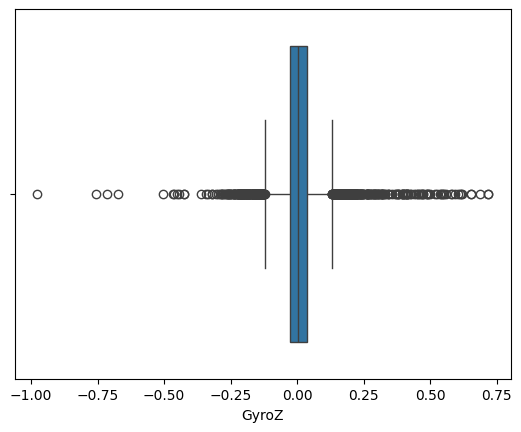

In [23]:
sns.boxplot(x='GyroZ',data=df)
plt.show()


In [24]:
# to drop outlayers from column "AccX"
Q25=np.percentile(df["AccX"],25)
Q75=np.percentile(df["AccX"],75)

print("outlier 25==>",Q25)
print("outlier 75==>",Q75)

IQR=Q75-Q25
print('IQR ==<',IQR)


Cutoff=IQR*1.5
Q25_lower=Q25-Cutoff
Q75_upper=Q75+Cutoff

print('Q25_lower ==>',Q25_lower)
print('Q75_upper ==>',Q75_upper)

Outlier=df.loc[((df["AccX"]>Q75_upper)|(df['AccX']<Q25_lower))]
# print("outlier: ",Outlier)
print("len outlier :",len(Outlier))
df.loc[((df['AccX']>Q75_upper),'AccX')]=Q75_upper
df.loc[((df['AccX']<Q25_lower),'AccX')]=Q25_lower
# Outlier=df.loc[((df["radius_mean"]>Q75_upper)|(df['radius_mean']<Q25_lower))]
print("len outlier :",len(Outlier))



outlier 25==> -0.408916115
outlier 75==> 0.5791476025
IQR ==< 0.9880637175
Q25_lower ==> -1.89101169125
Q75_upper ==> 2.06124317875
len outlier : 160
len outlier : 160


In [25]:
# to drop outlayers from column "AccY"
Q25=np.percentile(df["AccY"],25)
Q75=np.percentile(df["AccY"],75)

print("outlier 25==>",Q25)
print("outlier 75==>",Q75)

IQR=Q75-Q25
print('IQR ==<',IQR)


Cutoff=IQR*1.5
Q25_lower=Q25-Cutoff
Q75_upper=Q75+Cutoff

print('Q25_lower ==>',Q25_lower)
print('Q75_upper ==>',Q75_upper)

Outlier=df.loc[((df["AccY"]>Q75_upper)|(df['AccY']<Q25_lower))]
# print("outlier: ",Outlier)
print("len outlier :",len(Outlier))
df.loc[((df['AccY']>Q75_upper),'AccY')]=Q75_upper
df.loc[((df['AccY']<Q25_lower),'AccY')]=Q25_lower
# Outlier=df.loc[((df["radius_mean"]>Q75_upper)|(df['radius_mean']<Q25_lower))]
print("len outlier :",len(Outlier))

outlier 25==> -0.6258676
outlier 75==> 0.393117865
IQR ==< 1.018985465
Q25_lower ==> -2.1543457975
Q75_upper ==> 1.9215960625000001
len outlier : 103
len outlier : 103


In [26]:
# to drop outlayers from column "GyroX"
Q25=np.percentile(df["GyroX"],25)
Q75=np.percentile(df["GyroX"],75)

print("outlier 25==>",Q25)
print("outlier 75==>",Q75)

IQR=Q75-Q25
print('IQR ==<',IQR)


Cutoff=IQR*1.5
Q25_lower=Q25-Cutoff
Q75_upper=Q75+Cutoff

print('Q25_lower ==>',Q25_lower)
print('Q75_upper ==>',Q75_upper)

Outlier=df.loc[((df["GyroX"]>Q75_upper)|(df['GyroX']<Q25_lower))]
# print("outlier: ",Outlier)
print("len outlier :",len(Outlier))
df.loc[((df['GyroX']>Q75_upper),'GyroX')]=Q75_upper
df.loc[((df['GyroX']<Q25_lower),'GyroX')]=Q25_lower
# Outlier=df.loc[((df["radius_mean"]>Q75_upper)|(df['radius_mean']<Q25_lower))]
print("len outlier :",len(Outlier))

outlier 25==> -0.02443461
outlier 75==> 0.028099801
IQR ==< 0.052534411
Q25_lower ==> -0.1032362265
Q75_upper ==> 0.10690141750000001
len outlier : 190
len outlier : 190


In [27]:
# to drop outlayers from column "GyroZ"
Q25=np.percentile(df["GyroZ"],25)
Q75=np.percentile(df["GyroZ"],75)

print("outlier 25==>",Q25)
print("outlier 75==>",Q75)

IQR=Q75-Q25
print('IQR ==<',IQR)


Cutoff=IQR*1.5
Q25_lower=Q25-Cutoff
Q75_upper=Q75+Cutoff

print('Q25_lower ==>',Q25_lower)
print('Q75_upper ==>',Q75_upper)

Outlier=df.loc[((df["GyroZ"]>Q75_upper)|(df['GyroZ']<Q25_lower))]
# print("outlier: ",Outlier)
print("len outlier :",len(Outlier))
df.loc[((df['GyroZ']>Q75_upper),'GyroZ')]=Q75_upper
df.loc[((df['GyroZ']<Q25_lower),'GyroZ')]=Q25_lower
# Outlier=df.loc[((df["radius_mean"]>Q75_upper)|(df['radius_mean']<Q25_lower))]
print("len outlier :",len(Outlier))

outlier 25==> -0.027030786
outlier 75==> 0.035888333
IQR ==< 0.062919119
Q25_lower ==> -0.1214094645
Q75_upper ==> 0.1302670115
len outlier : 485
len outlier : 485


In [28]:
X=StandardScaler().fit_transform(df)

In [29]:
X=df[['AccX','AccY','GyroZ','GyroX','Timestamp']]
y=df['Class']

In [30]:

regressor = ExtraTreesClassifier(max_depth=5, n_estimators=7, random_state=0)
regressor.fit(X, y)

ExtraTreesClassifier(max_depth=5, n_estimators=7, random_state=0)

In [31]:

kfold = KFold(n_splits=5, shuffle=True, random_state=1)  

In [32]:

scores = cross_val_score(regressor, X, y, cv=kfold, scoring='r2')

In [33]:
print("Scores for each fold: ", scores)
print("Mean R^2 score: ", np.mean(scores))

Scores for each fold:  [0.90256869 0.88963135 0.90959118 0.96380213 0.89370059]
Mean R^2 score:  0.9118587884483447


In [34]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(128, activation='leaky_relu', input_shape=(56,)),
#     tf.keras.layers.Dense(64, activation='leaky_relu'),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

In [35]:
# # تجميع النموذج
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [36]:
# # تدريب النموذج
# model.fit(X_train, y_train, epochs=70)

In [37]:

# # تقييم النموذج
# loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
# print(f'Loss: {loss}, Accuracy: {accuracy}')